# Overview

### Setting up the environment

Here we set up the necessary packages and modules in order to conduct our research. For this notebook we are incorporating our own custom GloVe Embeddings for word vectors to train our models with.

### Visualization

We use the matplotlib library to visualize our data after training and testing using:
* AUC and ROC Curve
* Confusion Matrix
* Scatterplot

Classification metrics will be displayed in a tabled format, that includes
* Precision and Accuracy
* Recall
* F-Score

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

%matplotlib inline

#Import module to split the datasets
from sklearn.model_selection import train_test_split
# Import modules to evaluate the metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc

In [2]:
# Setting Global Parameters
# root folder
root_folder='../'
data_folder_name='data'
glove_filename='vaccine_vectors.txt' # The GloVe embedding file for vaccination controversy

train_filename='../data/vaccine_train.csv'
test_filename='../data/vaccine_test.csv'
dataset='../data/vaccine.csv'

# Variable for data directory
DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))
glove_path = os.path.abspath(os.path.join(DATA_PATH, glove_filename))

data = pd.read_csv(dataset)
data.head()

,labels,captions
0,0,oh news tucker carlson eat whoa say tucker eat...
1,0,protective really need children dependent us w...
2,0,may know body engaged never-ending battle lite...
3,0,deserts american southwest spadefoot toad tadp...
4,0,loves new dog got today tortoise died boy dog ...


In [3]:
data.labels.value_counts()

0    573
1     46
Name: labels, dtype: int64

In [4]:
# Separating features

# X = data.captions
# Y = data.labels

# X.head()

# The GloVe Embeddings

For this research we used a custom GloVe model that has a vocabulary size of 11757 with 100 dimensions.
The following occurs in this section:

* Representation of the GloVe Vectors.
* Converting GloVe vectors to word2vec format
* TSNE scatterplot to visualize word vectors


In [5]:
glove = pd.read_csv(glove_path)
glove.head()

,like -0.231193 -1.125172 -0.008544 -0.512462 -0.566759 1.298125 0.209930 0.588791 -0.551251 -0.591973 0.871517 -0.494942 -0.925739 -0.238618 -1.699303 -1.278787 0.497207 -0.558321 -0.052597 0.737117 0.377340 0.045316 0.102027 -0.181289 1.167820 -0.904182 -1.023985 -0.439319 -0.543830 -0.479546 0.774910 1.133257 -0.380360 1.129063 0.328190 1.480020 1.165351 0.814394 -0.347477 -0.741559 1.046305 0.395215 -0.159193 1.298572 0.399062 0.141585 -1.336291 -0.546790 -0.535407 -0.425153 -0.271598 0.501812 0.259812 -0.920403 2.211353 0.349647 0.141415 0.330795 -0.069967 0.041223 1.148281 0.226263 -0.112810 -0.679315 -1.222641 0.903276 -1.131383 -0.008611 1.483426 -0.068453 -0.130026 0.887090 -0.222114 -1.473713 -1.432865 1.581722 0.136164 -0.155196 -0.538670 -1.147315 -0.265270 0.961665 0.086036 -0.005195 0.124995 -0.124899 -0.401130 -0.326257 0.421935 0.886656 -0.892567 0.241314 0.524878 -0.522565 -0.364145 -0.206653 0.160776 0.436810 0.048463 0.105313
0,know -1.025717 -0.923818 0.193803 -0.439858 -1...
1,people -0.780651 -1.034418 0.401302 -1.379287 ...
2,uh -0.783818 -0.677396 0.697857 0.130859 -0.42...
3,um -1.255657 -0.529882 0.642616 -0.109619 -0.4...
4,one -1.281789 -0.704425 0.566225 -0.573702 -0....


In [6]:
from gensim.scripts.glove2word2vec import glove2word2vec

# glove_input_file = glove_filename
word2vec_output_file = glove_filename+'.word2vec'
glove2word2vec(glove_path, word2vec_output_file)

C:\Users\richa\AppData\Local\Temp/ipykernel_27756/129958964.py:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_path, word2vec_output_file)


(11757, 100)

In [7]:
from gensim.models import KeyedVectors
# loading our custom GloVe Model
word2vec_output_file = glove_filename+'.word2vec'
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Printing a single word embedding
print('vaccine: ', model.get_vector('vaccine'))

result = model.most_similar(positive=['vaccine', 'covid'], negative=['pandemic'], topn=1)

print('Most similar word to vaccine + covid: ', result)

vaccine:  [-1.660872e+00 -4.027140e-01  1.240326e+00 -1.510844e+00 -1.840830e-01
  9.289140e-01  3.052290e-01  3.312270e-01  1.702900e-01 -1.456569e+00
  7.779530e-01 -4.438000e-02 -9.227660e-01  3.359360e-01 -6.743500e-01
 -1.041295e+00 -1.496960e-01 -1.888004e+00 -3.564200e-02 -2.652990e-01
  1.227984e+00  6.553160e-01 -1.400480e-01 -1.272494e+00  5.688430e-01
 -2.454430e-01  6.743730e-01  2.641740e-01 -5.092520e-01  1.626230e-01
 -3.401240e-01 -1.750270e-01 -6.354900e-02 -1.425260e+00  2.760950e-01
  1.997970e-01 -1.910000e-04  1.158720e-01  2.901880e-01 -9.202800e-02
  1.123738e+00 -4.882440e-01  1.202740e-01  3.502720e-01  4.835130e-01
  1.008862e+00 -4.581230e-01 -2.013880e-01  1.031146e+00 -2.078840e-01
  1.956230e-01  9.416680e-01  1.473907e+00 -7.798490e-01  5.563350e-01
 -5.195540e-01  1.721940e-01  4.446240e-01  3.684100e-02  4.645270e-01
  1.174515e+00  6.828660e-01 -5.721690e-01  3.963170e-01 -1.910222e+00
  1.703420e-01 -5.910740e-01 -2.582590e-01  6.451790e-01 -2.752080e

In [8]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction

def display_closestwords_tsnescatterplot(model, dim, words):
    
    arr = np.empty((0,dim), dtype='f')
    word_labels = words

    # get close words
    # close_words = [model.similar_by_word(word) for word in words]
    
    # add the vector for each of the closest words to the array
    close_words=[]
    for word in words:
        arr = np.append(arr, np.array([model[word]]), axis=0)
        close_words +=model.similar_by_word(word)
        
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    #np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
    
def tsne_plot(model, words):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    #for word in model.wv.vocab:
    for word in words:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(14, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\richa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\richa\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


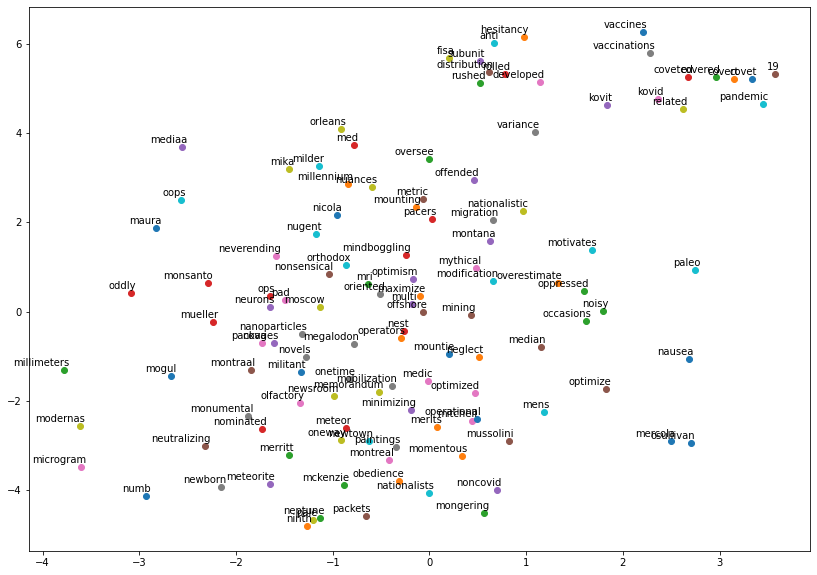

In [9]:
words = list(model.index_to_key)
word1 = words[10000:10100]
words2= model.similar_by_word('covid')
words3= model.similar_by_word('vaccine')
words= word1 + [w[0] for w in words2] + [w[0] for w in words3]

tsne_plot(model, words)

# Data Processing

### Cleaning the data

Before we can perform any training and testing on our models, the data needs to be cleaned. Prior to this, the data has been cleaned on a separate notebook but for demonstration purposes the data will be processed again.

Here we perform:

* Removing urls from text
* Removing any symbols, emojis, and similar characters
* Removing punctuations

In [10]:
import re
import string

def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)


def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)


def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)

In [11]:
# numerical types to strings
data["captions"] = data["captions"].fillna("").apply(str)
data["captions"] = data["captions"].fillna("").astype('string')

In [12]:
data["captions"] = data.captions.map(lambda x: remove_URL(x))
data["captions"] = data.captions.map(lambda x: remove_html(x))
data["captions"] = data.captions.map(lambda x: remove_emoji(x))
data["captions"] = data.captions.map(lambda x: remove_punct(x))

### Tokenizing and Vectorizing

#### Tokenizing

In order for our converted word2vec embeddings to work with the dataset, without increasing the complexity of our models, we need to tokenize the data, and convert them into word2vec readable formats.

Here we do the follwing:

* Create the vaccine controversy data corpus
* Set the train and test size (50/50)
* Tokenize the train and test data using Keras

In [13]:
from nltk.tokenize import word_tokenize
import nltk


def create_corpus_tk(df):
    vaccine_corpus = []
    for text in data["captions"]:
        words = [word.lower() for word in word_tokenize(text)]
        vaccine_corpus.append(words)
    return vaccine_corpus

# Creating the vaccine data corpus
vaccine_corpus = create_corpus_tk(data)
num_words = len(vaccine_corpus)

In [14]:
train_size = int(data.shape[0] * 0.5)

train_sentences = data.captions[:train_size]
train_labels = data.labels[:train_size]

test_sentences = data.captions[train_size:]
test_labels = data.labels[train_size:]

print(train_size)

309


In [15]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

max_len = 100

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(train_sentences)

# Tokenizing the caption data
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(
    train_sequences, maxlen=max_len, truncating="post", padding="post"
)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(
    test_sequences, maxlen=max_len, padding="post", truncating="post"
)

In [16]:
word_index = tokenizer.word_index
print("Number of unique words:", len(word_index))

word_index['like']

Number of unique words: 22150


2

In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse = [reverse_word_index.get(i, "") for i in train_sequences[0]]

reverse_word_index

{1: 'know',
 2: 'like',
 3: 'people',
 4: 'one',
 5: 'get',
 6: 'going',
 7: 'would',
 8: 'think',
 9: 's',
 10: 'really',
 11: 'vaccines',
 12: 'right',
 13: 'vaccine',
 14: 'want',
 15: 'us',
 16: 'time',
 17: 'go',
 18: 'well',
 19: 'say',
 20: 'got',
 21: 'could',
 22: 'see',
 23: 'children',
 24: 'even',
 25: 'make',
 26: 'yeah',
 27: 'lot',
 28: 'way',
 29: 'good',
 30: 'also',
 31: 'actually',
 32: 'something',
 33: 'look',
 34: 'back',
 35: 'thing',
 36: 'said',
 37: 'things',
 38: 'let',
 39: 'years',
 40: 'take',
 41: 'first',
 42: 'two',
 43: 'little',
 44: 'okay',
 45: 'kids',
 46: 'mean',
 47: 'much',
 48: 'need',
 49: 'parents',
 50: 'autism',
 51: 'every',
 52: 'child',
 53: 'oh',
 54: 'measles',
 55: 'many',
 56: 'put',
 57: 'kind',
 58: 'health',
 59: 'new',
 60: 'still',
 61: 'vaccinated',
 62: 'getting',
 63: 'never',
 64: 'work',
 65: 'day',
 66: 'yes',
 67: 'year',
 68: 'life',
 69: 'come',
 70: 'disease',
 71: 'around',
 72: 'tell',
 73: 'give',
 74: 'world',
 75:

In [18]:
# Reversing the word tokenization to store into train and test sets
X_train=[]
for doc in train_sequences:
    X_train.append(' '.join([reverse_word_index.get(i, "") for i in doc]))

X_test=[]
for doc in test_sequences:
    X_test.append(' '.join([reverse_word_index.get(i, "") for i in doc]))

In [19]:
print(len(X_train),len(X_test))

309 310


#### Vectorizing

From our GloVe embedding model we processed above, we now need to vectorize that output data into the word2vec format. 

We then do the following:

* Check to see if any word in the train and test sets are out of vocabulary
* Vectorize the training and test sets

In [20]:
class Word2VecVectorizer:
  def __init__(self, model):
    print("Loading in word vectors...")
    self.word_vectors = model
    print("Finished loading in word vectors")

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('vaccine')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Number of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [21]:
# Set a word vectorizer
vectorizer = Word2VecVectorizer(model)

# Get the sentence embeddings for the train dataset
Xtrain = vectorizer.fit_transform(X_train)
Ytrain = train_labels

# Get the sentence embeddings for the test dataset
Xtest = vectorizer.transform(X_test)
Ytest = test_labels

Xtrain[0]

Loading in word vectors...
Finished loading in word vectors
Number of samples with no words found: 0 / 309
Number of samples with no words found: 0 / 310


array([-3.17636937e-01, -4.34692830e-01,  2.33848214e-01, -1.36026800e-01,
       -2.50938714e-01,  6.63140535e-01, -1.07170083e-02,  2.72798717e-01,
        2.00503036e-01, -4.93362457e-01,  3.75969380e-01,  3.27374905e-01,
       -2.06602186e-01, -1.41395196e-01, -4.99825537e-01, -6.60449147e-01,
        6.15001619e-02, -3.64766061e-01, -2.65362412e-01,  1.05909355e-01,
        3.24102432e-01, -1.70667976e-01, -3.75136621e-02, -4.09551054e-01,
        2.68700391e-01, -9.53757626e-05, -2.01566368e-01, -3.57805014e-01,
       -9.57224071e-02,  1.31426319e-01, -1.21064685e-01, -2.13128254e-02,
       -2.15328991e-01,  2.68846810e-01, -9.37481150e-02,  5.24373412e-01,
        3.05337250e-01,  3.18449497e-01, -8.41336772e-02, -2.26573646e-02,
        1.75972134e-01, -3.31846029e-01, -2.89783746e-01,  5.45589805e-01,
       -1.01470850e-01,  2.41662338e-01, -4.06028718e-01, -2.62550116e-01,
        2.57364422e-01, -3.44042748e-01, -1.30294770e-01,  5.19998670e-02,
        3.89356792e-01, -

In [22]:
print(Xtrain.shape, Xtest.shape)

(309, 100) (310, 100)


# Training and Testing

## Results

### Class Imbalances

After setting up the training and testing data, we now add them to our classifiers and run them to see the results.

In this section we will look at the results of one classifier with class imbalances, then we will applying SMOTE to fix our class imbalance and run the models again with the new class data.

In [23]:
# Create the confussion matrix
def plot_confussion_matrix(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()
    
# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameters to tune
parameters = { 
    'C': [1.0, 10],
    'gamma': [1, 'auto', 'scale']
}
# Tune yyperparameters  using Grid Search and a SVM model
model = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5, n_jobs=-1).fit(Xtrain, Ytrain)

              precision    recall  f1-score   support

           0   0.923588  0.982332  0.952055       283
           1   0.444444  0.148148  0.222222        27

    accuracy                       0.909677       310
   macro avg   0.684016  0.565240  0.587139       310
weighted avg   0.881856  0.909677  0.888489       310



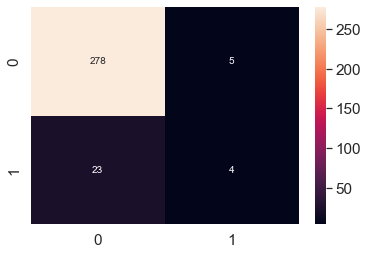

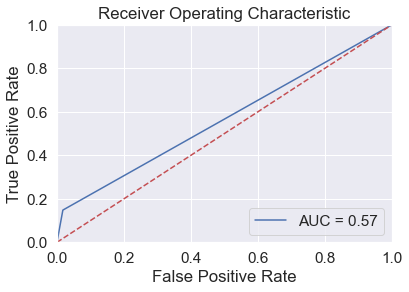

In [25]:
y_pred = model.predict(Xtest)

print(metrics.classification_report(Ytest, y_pred,  digits=6))
plot_confussion_matrix(Ytest, y_pred)
plot_roc_curve(Ytest, y_pred)

### Using SMOTE to Balance our Classes

An issue with our datasets is that they are very imbalanced. This means that our models would not be able to accurately differentiate between classes when training and testing. 

SMOTE fixes this issue by inserting Sythethic or artificial classes. So now the minority class, which in this case is **1**, has the same number of values as the other class.

309    0
310    0
311    0
312    0
313    0
      ..
614    0
615    0
616    0
617    0
618    0
Name: labels, Length: 310, dtype: int64

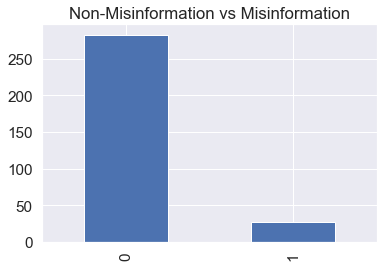

In [26]:
test_labels.value_counts().plot(kind='bar', title='Non-Misinformation vs Misinformation');
type(test_labels.value_counts())
Ytest

In [27]:
from sklearn import preprocessing
from sklearn import utils

# convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Ytrain)

# view transformed values
print(y_transformed)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0]


In [28]:
Xtrain.size

30900

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(Xtrain, y_transformed)

Samples before:  309
Samples after:  580


580.0

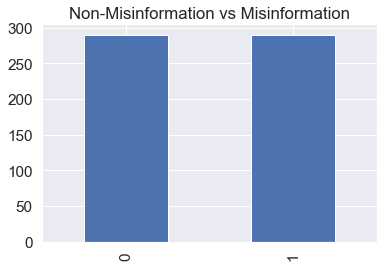

In [30]:
# Convert to series to display easily
new_labels = pd.Series(y_sm) 
new_labels.value_counts().plot(kind='bar', title='Non-Misinformation vs Misinformation');

print("Samples before: ", y_transformed.size)
print("Samples after: ", y_sm.size)

X_sm.size/100

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameters to tune
parameters = { 
    'C': [1.0, 10],
    'gamma': [1, 'auto', 'scale']
}
# Tune yyperparameters  using Grid Search and a SVM model
model = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5, n_jobs=-1).fit(X_sm, y_sm)

              precision    recall  f1-score   support

           0   0.943662  0.946996  0.945326       283
           1   0.423077  0.407407  0.415094        27

    accuracy                       0.900000       310
   macro avg   0.683369  0.677202  0.680210       310
weighted avg   0.898321  0.900000  0.899145       310



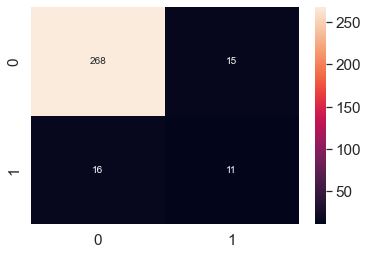

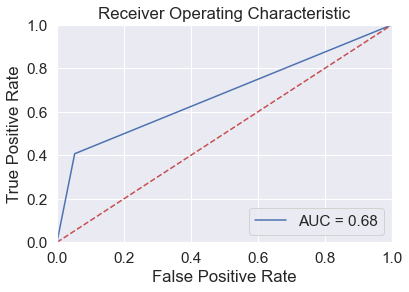

In [32]:
y_pred = model.predict(Xtest)

print(metrics.classification_report(Ytest, y_pred,  digits=6))
plot_confussion_matrix(Ytest, y_pred)
plot_roc_curve(Ytest, y_pred)

In [33]:
from sklearn.ensemble import RandomForestClassifier

# create the model, train it, print scores
clf = RandomForestClassifier(n_estimators=5)

clf.fit(X_sm, y_sm)

print("train score:", clf.score(Xtrain, Ytrain))
print("test score:", clf.score(Xtest, Ytest))

train score: 0.9935275080906149
test score: 0.9


              precision    recall  f1-score   support

           0    0.92568   0.96820   0.94646       283
           1    0.35714   0.18519   0.24390        27

    accuracy                        0.90000       310
   macro avg    0.64141   0.57669   0.59518       310
weighted avg    0.87616   0.90000   0.88527       310



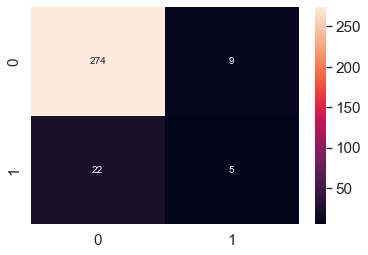

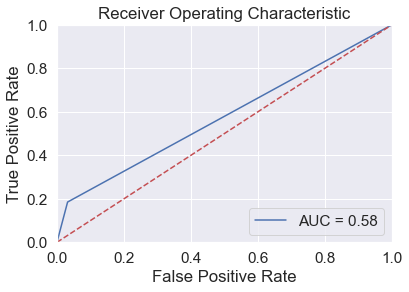

In [34]:
y_pred = clf.predict(Xtest)

print(metrics.classification_report(Ytest, y_pred,  digits=5))
plot_confussion_matrix(Ytest, y_pred)
plot_roc_curve(Ytest, y_pred)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=25)
model.fit(X_sm, y_sm)
y_pred = model.predict(Xtest)

              precision    recall  f1-score   support

           0    0.98469   0.68198   0.80585       283
           1    0.21053   0.88889   0.34043        27

    accuracy                        0.70000       310
   macro avg    0.59761   0.78543   0.57314       310
weighted avg    0.91727   0.70000   0.76531       310



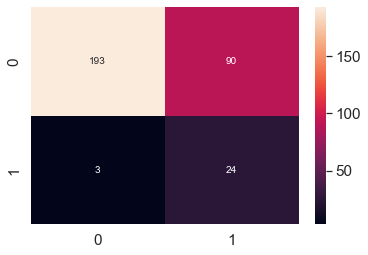

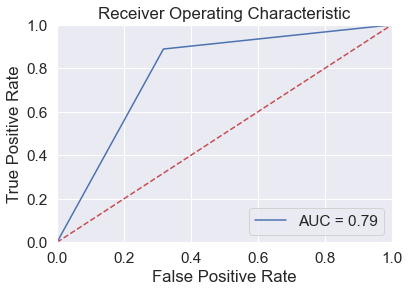

In [36]:
print(metrics.classification_report(Ytest, y_pred,  digits=5))
plot_confussion_matrix(Ytest, y_pred)
plot_roc_curve(Ytest, y_pred)

## Limitations

Despite the working models, there are some limitations of artefact.

* The domain-specific problem made data collection difficult
    * Severely limited in the number of relevant data available.
* The size of our GloVe vocabulary is extremely small compared to pre-trained embeddings
* The small datasets make it difficult to work with some classifiers.
